<a href="https://colab.research.google.com/github/namespaiva/pi-acidentes/blob/main/acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento e geração do csv

In [ ]:
!pip install googlemaps
!pip install odfpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import googlemaps
from datetime import datetime
from google.colab import userdata

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40716 sha256=2b9807e15202cc50cf2ce19874ee8858fb30fe494da4a88b90efebbf4d1e48f7
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160671 sha256=8587698f2f1c62b75aebcf3bff599ac93b54b8bf99115d538b64fd54e6b95768
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [ ]:
# # Código de tratamento
# for ano in range(2015, 2020):
#   if f'Acidentes {ano}.ods' not in os.listdir():
#     !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/Acidentes%20{ano}.ods

# for ano in range(2020, 2025):
#   if f'Acidentes {ano}.xls' not in os.listdir():
#     !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/Acidentes%20{ano}.xls

# dados = pd.DataFrame()

# for ano in range (2015, 2020):
#   dados = pd.concat([dados, pd.read_excel(f'Acidentes {ano}.ods', engine='odf')])

# dados1 = dados.copy()

# for ano in range(2020, 2025):
#   dados = pd.concat([dados, pd.read_excel(f'Acidentes {ano}.xls')])

# df = dados.sort_values(by=['DATA', 'HORA'])

# df['CRUZAMENTO'] = df['CRUZAMENTO'].astype(str) + df['CRUZAMENTO.1'].astype(str)
# df['LOGRADOURO'] = df['LOGRADOURO'].astype(str) + df['LOGRADOURO1'].astype(str)
# df = df.drop(columns=['LOGRADOURO1', 'CRUZAMENTO.1', 'Unnamed: 0', 2])
# df.rename(columns={'Nº': 'NUMERO'}, inplace=True)
# df.to_csv('acidentes.csv', index=False)

# def remove_nans(s):
#     s = str(s)
#     if s == 'nan':
#         return s
#     elif s.startswith("nan"):
#         return s[3:]  # Skip the first 3 characters if they are "nan"
#     elif s.endswith("nan"):
#         return s[:-3]  # Skip the last 3 characters if they are "nan"
#     else:
#       return s

# df['LOGRADOURO'] = df['LOGRADOURO'].apply(remove_nans)
# df['CRUZAMENTO'] = df['CRUZAMENTO'].apply(remove_nans)

# df['DATA'] = pd.to_datetime(df['DATA'])
# df['NUMERO'] = df['NUMERO'].astype(str)
# df['lat'] = ''
# df['lng'] = ''
# df['types'] = ''
# df['bairro'] = ''
# df.rename(columns={'DATA': 'data', 'HORA': 'hora', 'TEMPO': 'tempo',
#                    'TIPO_ACIDENTE': 'tipo_acidente', 'GRAVIDADE': 'gravidade',
#                    'LOGRADOURO': 'logradouro', 'NUMERO': 'numero', 'CRUZAMENTO': 'cruzamento'}, inplace=True)

In [ ]:
# gravidades = list(df['gravidade'].unique())

# df['gravidade'] = df['gravidade'].apply(lambda x: 'nan' if pd.isna(x) else x)
# df['gravidade'] = df['gravidade'].apply(lambda x: 'nan' if x == ' ' else x)

In [ ]:
# gravidades = list(df['gravidade'].unique())
# gravidades.remove('nan')
# df['temp'] = df['cruzamento']

# new_gravidade_values = []
# new_temp_values = []

# for index, row in df.iterrows():
#     temp_value = row['temp']
#     for gravidade in gravidades:
#         if str(gravidade) in temp_value:
#             new_gravidade_values.append(str(gravidade))
#             temp_value = temp_value.replace(str(gravidade), '')
#             break
#     else:
#         new_gravidade_values.append(np.nan)

#     new_temp_values.append(temp_value)

# df['temp'] = new_temp_values

# df['cruzamento'] = df['temp']
# df.drop(columns=['temp'], axis=1, inplace=True)

In [ ]:
# df[df['data'].dt.year == 2021]
# df['cruzamento'] = df['cruzamento'].apply(lambda x: 'nan' if x == '' else x)
# df['cruzamento'].unique()

In [ ]:
# !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/Acidentes%202021.xls

# df = pd.read_csv('acidentes.csv')
# df['data'] = pd.to_datetime(df['data'])
# df.sort_values(by=['data', 'hora'], inplace=True)
# df.reset_index(drop=True, inplace=True)

# df2021 = pd.read_excel('Acidentes 2021.xls')

# mask_2021 = df['data'].dt.year == 2021

# # Check if the number of rows matches
# if len(df2021) == sum(mask_2021):
#     # Update 'gravidade' column where the year is 2021
#     df.loc[mask_2021, 'gravidade'] = df2021['CRUZAMENTO'].values
# else:
#     print("Erro filtrando df")

In [ ]:
df = pd.read_csv('acidentes.csv')
df.sort_values(by=['data', 'hora'], inplace=True)
df.reset_index(drop=True, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'acidentes.csv'

In [ ]:
chave = userdata.get('chave')

gmaps = googlemaps.Client(key=chave)

In [ ]:
for index, row in df.iterrows():
  if pd.isna(row['cruzamento']):
    local = str(row['numero']) + ' ' + str(row['logradouro'])
  else:
    local = str(row['logradouro']) + ' ' + str(row['cruzamento'])

  geocode_result = gmaps.geocode(f'{local}, Santos, SP, Brazil')

  if pd.isna(row['cruzamento']):
    if len(geocode_result[0]['address_components']) > 2 and 'long_name' in geocode_result[0]['address_components'][2]:
      df.at[index, 'bairro'] = geocode_result[0]['address_components'][2]['long_name']
    else:
      print(index)
      df.at[index, 'bairro'] = 'Bairro não encontrado'
  else:
    if len(geocode_result[0]['address_components']) > 2 and 'long_name' in geocode_result[0]['address_components'][2]:
      df.at[index, 'bairro'] = geocode_result[0]['address_components'][1]['long_name']
    else:
      print(index)
      df.at[index, 'bairro'] = 'Bairro não encontrado'

  df.at[index, 'types'] = geocode_result[0]['types']
  df.at[index, 'lat'] = geocode_result[0]['geometry']['location']['lat']
  df.at[index, 'lng'] = geocode_result[0]['geometry']['location']['lng']

df.head(10)

In [ ]:
df.to_csv('acidenteslats.csv', index=False)

# Análise

In [1]:
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

if 'acidentes.csv' not in os.listdir():
  !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/acidentes.csv

dados = pd.read_csv('acidentes.csv')

dados.sort_values(by=['data', 'hora'], inplace=True)
dados.reset_index(drop=True, inplace=True)
dados['data'] = pd.to_datetime(dados['data'])
dados['dia_semana'] = (dados['data'].dt.dayofweek)
dias = {0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 1}
dados['dia_semana'] = dados['dia_semana'].map(dias)
dados.sample(1)

--2024-11-14 17:35:24--  https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/acidentes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4697579 (4.5M) [text/plain]
Saving to: ‘acidentes.csv’

acidentes.csv       100%[===================>]   4.48M  --.-KB/s    in 0.02s   

2024-11-14 17:35:24 (260 MB/s) - ‘acidentes.csv’ saved [4697579/4697579]



,data,hora,tempo,tipo_acidente,gravidade,logradouro,numero,cruzamento,lat,lng,types,bairro,dia_semana
4211,2015-08-08,20:30:00,BOM,CHOQUE,S/ LESÃO,Avenida Martins Fontes,0,Praça Ruy de Lugo Viña,-23.930471,-46.346647,['intersection'],Saboó,7


In [2]:
dfnum = dados.copy()
dfnum = dados[dados['data'].dt.year > 2017]
cols = ['gravidade', 'tempo', 'tipo_acidente', 'logradouro', 'cruzamento']

for col in cols:
  cats = list(dfnum[col].unique())
  for i, cat in enumerate(cats):
    dfnum.loc[dfnum[col] == cat, col] = i

In [3]:
cols.append('data')
cols.append('hora')
cols.append('dia_semana')
cols.append('lat')
cols.append('lng')
dfnum['data'] = dfnum['data'].apply(lambda x: int(x.timestamp()))
dfnum['hora'] = pd.to_datetime(dfnum['hora']).dt.hour * 3600 + pd.to_datetime(dfnum['hora']).dt.minute * 60 + pd.to_datetime(dfnum['hora']).dt.second
dfnum = dfnum[cols]

<ipython-input-3-35fd58ca2883>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum['data'] = dfnum['data'].apply(lambda x: int(x.timestamp()))
<ipython-input-3-35fd58ca2883>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfnum['hora'] = pd.to_datetime(dfnum['hora']).dt.hour * 3600 + pd.to_datetime(dfnum['hora']).dt.minute * 60 + pd.to_datetime(dfnum['hora']).dt.second
<ipython-input-3-35fd58ca2883>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfnum['hora'] = pd.t

In [4]:
color = sns.color_palette("Paired")
mask = np.tril(np.ones_like(dfnum.corr(), dtype=bool))
plt.figure(figsize=(8, 6))
# sns.heatmap(dfnum.corr(), mask=mask, cmap= 'coolwarm', annot=True)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

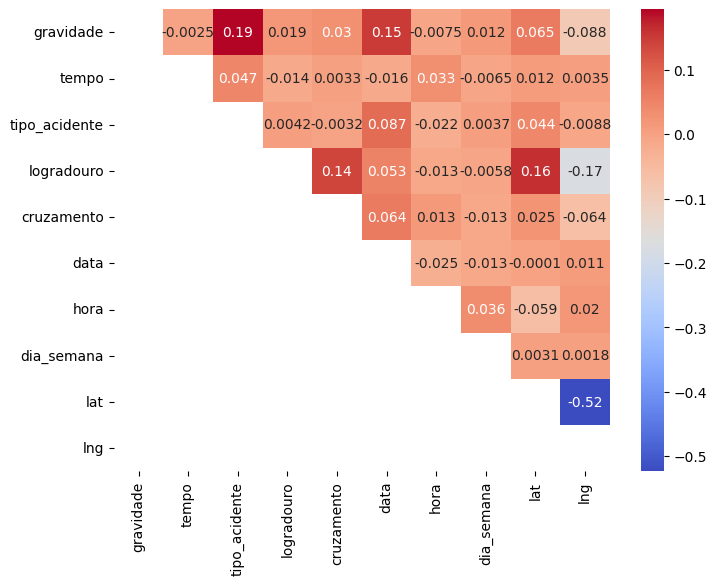

In [5]:
dfnorm = dfnum.copy()

dfnorm = (dfnorm - dfnorm.min()) / (dfnorm.max() - dfnorm.min())

color = sns.color_palette("Paired")
mask = np.tril(np.ones_like(dfnorm.corr(), dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(dfnorm.corr(), mask=mask, cmap= 'coolwarm', annot=True)

In [6]:
!pip install plotly
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.4 MB/s eta 0:00:00


In [7]:
from sklearn.cluster import DBSCAN
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

df = dados.copy()
df = df[df['data'].dt.year > 2017]

#coords = dfnum[['lat', 'lng', 'logradouro']].values
coords = df[['lat', 'lng']].values

# Normalizar as coordenadas
scaler = StandardScaler()
coords = scaler.fit_transform(coords)

db = DBSCAN(metric='cityblock',
            eps=0.05,
            min_samples=20
            ).fit(coords)
df['dbscan_cluster'] = db.labels_

fig = go.Figure()

unique_clusters = df['dbscan_cluster'].unique()
for cluster in unique_clusters:
    cluster_df = df[df['dbscan_cluster'] == cluster]
    fig.add_trace(go.Scattermapbox(
        lat=cluster_df['lat'],
        lon=cluster_df['lng'],
        mode='markers',
        marker=dict(size=8, opacity=0.7),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    mapbox=dict(
        style="carto-darkmatter",
        center=dict(lat=df['lat'].mean(), lon=df['lng'].mean()),
        zoom=12,
    ),
    margin=dict(l=0, r=0, t=20, b=0),
    showlegend=True
)

In [8]:
df = dados.copy()
df = df[df['data'].dt.year > 2017]

#coords = dfnum[['lat', 'lng', 'logradouro']].values
coords = df[['lat', 'lng']].values

# Normalizar as coordenadas
scaler = StandardScaler()
coords = scaler.fit_transform(coords)

hdb = HDBSCAN(metric='cityblock',
              min_cluster_size=120,
              min_samples=15,
              cluster_selection_epsilon=0.05,
              cluster_selection_method='eom'
              ).fit(coords)

df['hdbscan_cluster'] = hdb.labels_
fig = go.Figure()

unique_clusters = df['hdbscan_cluster'].unique()
for cluster in unique_clusters:
    cluster_df = df[df['hdbscan_cluster'] == cluster]
    fig.add_trace(go.Scattermapbox(
        lat=cluster_df['lat'],
        lon=cluster_df['lng'],
        mode='markers',
        marker=dict(size=8, opacity=0.7),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    mapbox=dict(
        style="carto-darkmatter",
        center=dict(lat=df['lat'].mean(), lon=df['lng'].mean()),
        zoom=12,
    ),
    margin=dict(l=0, r=0, t=20, b=0),
    showlegend=True
)

In [9]:
df = dados.copy()
dfano = df[df['data'].dt.year > 2017]

tl = folium.TileLayer('https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png',
                      attr='<a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors; <a href="https://carto.com/attributions">CARTO</a>', #Make sure that the `attr` is not empty and contains valid HTML.
                      subdomains='abcd',
                      maxZoom=20,
                      control=False)

m = folium.Map(location=[-23.959, -46.332], zoom_start=13, tiles=tl)

heat_data = [[row['lat'], row['lng']] for index, row in dfano.iterrows()]
HeatMap(heat_data, radius=15,control=False).add_to(m)
m

In [10]:
import plotly.express as px

df = dados.copy()
df = df[df['data'].dt.year > 2017]

fig = px.density_mapbox(df, lat = 'lat', lon = 'lng',
                        radius = 5,
                        center = dict(lat = -23.959, lon = -46.332),
                        zoom = 13,
                        mapbox_style = 'open-street-map',
                        opacity = 0.7,
                        color_continuous_scale='rainbow')

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
)
fig.show()

In [11]:
# Heatmap por mês de cada ano

df = dados.copy()
df = df[df['data'].dt.year > 2017]
df['mes'] = df['data'].dt.month

heat_data = []
for _, group in df.groupby(pd.Grouper(key='data', freq='M')):
    heat_data.append([[row['lat'], row['lng'], 1] for _, row in group.iterrows()])

index = list(range(len(heat_data)))

m = folium.Map(location=[-23.959, -46.332], zoom_start=13, height=500, width=1000)

hm = folium.plugins.HeatMapWithTime(heat_data, index=index, auto_play=True, max_opacity=0.3, radius=15, gradient={'0':'Navy', '0.25':'Blue','0.5':'Green', '0.75':'Yellow','1': 'Red'})
hm.add_to(m)

m

<ipython-input-11-ab027fda072e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-ab027fda072e>:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

